a) We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. 
Choose test_size of 0.2 and random_state 42. 
Control the shapes of each X_train, X_test, y_train, y_test.

In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

mpg_df = sns.load_dataset('mpg')

In [401]:
# drop column name since its not necessary for the mpg evaluation
mpg_df.drop(["name"], axis = "columns", inplace = True)

In [402]:
# I need to convert the column origin from string to bool
mpg_df = pd.get_dummies(mpg_df, columns=["origin"], drop_first=True)

In [403]:
mpg_df["horsepower"] = mpg_df["horsepower"].fillna(mpg_df["horsepower"].median())

In [404]:
X, y = mpg_df.drop("mpg", axis = "columns"), mpg_df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")


X_train.shape = (318, 8)
X_test.shape = (80, 8)
y_train.shape = (318,)
y_test.shape = (80,)


In [405]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
3,8,304.0,150.0,3433,12.0,70,False,True
18,4,97.0,88.0,2130,14.5,70,True,False
376,4,91.0,68.0,2025,18.2,82,True,False
248,4,91.0,60.0,1800,16.4,78,True,False
177,4,115.0,95.0,2694,15.0,75,False,False


In [406]:
y_train.head()

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
Name: mpg, dtype: float64

b) Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

In [407]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min()} ≤ scaled_X_train ≤ {scaled_X_train.max()}")
print(f"{scaled_X_test.min()} ≤ scaled_X_test ≤ {scaled_X_test.max()}")

0.0 ≤ scaled_X_train ≤ 1.0
0.0 ≤ scaled_X_test ≤ 1.0279329608938548


In [ ]:
model = LinearRegression()
model.fit(scaled_X_train, y_train)
print(f"Parameters: {model.coef_}")
print(f"Intercept parameter: {model.intercept_}") 

Parameters: [ -0.82831888   7.65319985  -2.60657571 -24.85570897   1.14183757
   9.91163126  -0.27578067  -2.94690667]
Intercept parameter: 28.261495187308054


In [409]:
X_test.iloc[0]

cylinders           4
displacement     91.0
horsepower       53.0
weight           1795
acceleration     17.4
model_year         76
origin_japan     True
origin_usa      False
Name: 198, dtype: object

In [410]:
test_sample_features = scaled_X_test[0].reshape(1, -1)
test_sample_target = y_test.values[0]

print(f"Scaled features {test_sample_features}, label {test_sample_target}")
print(f"Prediction: {model.predict(test_sample_features)}")

Scaled features [[0.2        0.05943152 0.03910615 0.05160193 0.55952381 0.5
  1.         0.        ]], label 33.0
Prediction: [32.48505738]


In [411]:
y_pred = model.predict(scaled_X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 2.288158726714093, MSE: 8.338657478621618, RMSE: 2.887673367716927


In [ ]:
# looking up what and how much the columns effects the algorithm
coeffs = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)
print(coeffs)

        feature  coefficient
5    model_year     9.911631
1  displacement     7.653200
4  acceleration     1.141838
6  origin_japan    -0.275781
0     cylinders    -0.828319
2    horsepower    -2.606576
7    origin_usa    -2.946907
3        weight   -24.855709


Text(0, 0.5, 'Predicted MPG')

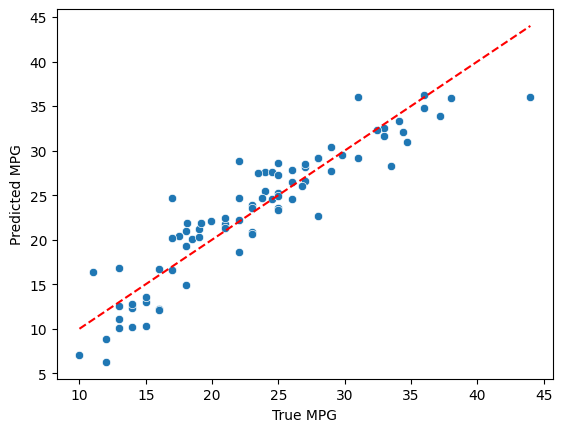

In [413]:

# visualise for a better understanding
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--') 
plt.xlabel("True MPG")
plt.ylabel("Predicted MPG")